In [1]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import logging
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

from tyssue import Sheet
from tyssue import SheetGeometry

##### Own functions
import src.cellDivisionOld as cellDivisionOld
import src.cellDivision as cellDivision
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

import warnings
warnings.filterwarnings("ignore")

collision solver could not be imported You may need to install CGAL and re-install tyssue
collision solver could not be imported You may need to install CGAL and re-install tyssue


C++ extension are not available for this version
C++ extension are not available for this version
Topology changed!
Topology changed!


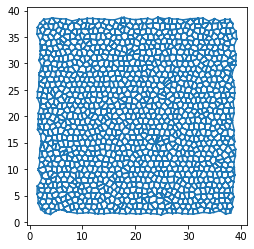

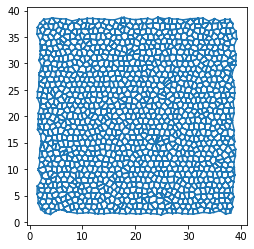

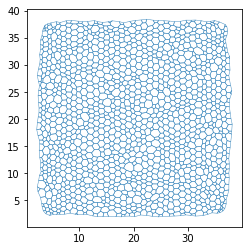

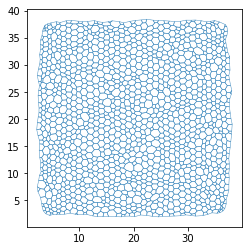

In [2]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
#auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
#auxFunctions.exportToMesh(history_H, './results')




In [3]:
### match length_elasticity of opposite edges 

for edge in range(len(cellmap_H.edge_df)):
    
    ### find the opposite edge of each edge in edges_list_without_opposites
    
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == cellmap_H.edge_df.loc[edge, "trgt"]) &
        (cellmap_H.edge_df["trgt"] == cellmap_H.edge_df.loc[edge, "srce"])
    ].index
    


    if len(opposite_edge_indices):
            # Update the values for the opposite edges
            cellmap_H.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity_ECM'][edge] 
            cellmap_H.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity_FRC'][edge] 
            cellmap_H.edge_df['length_elasticity'][opposite_edge_indices] = cellmap_H.edge_df['length_elasticity'][edge]
            
        
        
    
    ### match prefered_length of opposite edges 


for edge in range(len(cellmap_H.edge_df)):
    
    ### find the opposite edge of each edge in edges_list_without_opposites
    
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == cellmap_H.edge_df.loc[edge, "trgt"]) &
        (cellmap_H.edge_df["trgt"] == cellmap_H.edge_df.loc[edge, "srce"])
    ].index


    if len(opposite_edge_indices):
            # Update the values for the opposite edges
            cellmap_H.edge_df['prefered_length'][opposite_edge_indices] = cellmap_H.edge_df['prefered_length'][edge] 
            

In [4]:
sorted_df = cellmap_H.face_df.sort_values(by='area', ascending=False)
num_samples = int(0.2 * len(cellmap_H.face_df))

# Select the top 20% of areas
top_areas = sorted_df.head(num_samples)
top_areas.index

#random_indices = np.random.choice(cellmap_H.face_df.index, num_samples, replace=False)

# Select random areas
#random_areas = cellmap_H.face_df.loc[random_indices]

cellmap_H.face_df['prefered_area'].loc[top_areas.index] = 5

geom.update_all(cellmap_H)
energyContributions_model.compute_energy(cellmap_H)
vertexModel.solveEuler(cellmap_H, geom, energyContributions_model, endTime = 100)

 tyssue.geometry.planar_geometry.PlanarGeometry,
 tyssue.dynamics.factory.model_factory.<locals>.NewModel,

 tyssue.geometry.planar_geometry.PlanarGeometry,
 tyssue.dynamics.factory.model_factory.<locals>.NewModel,

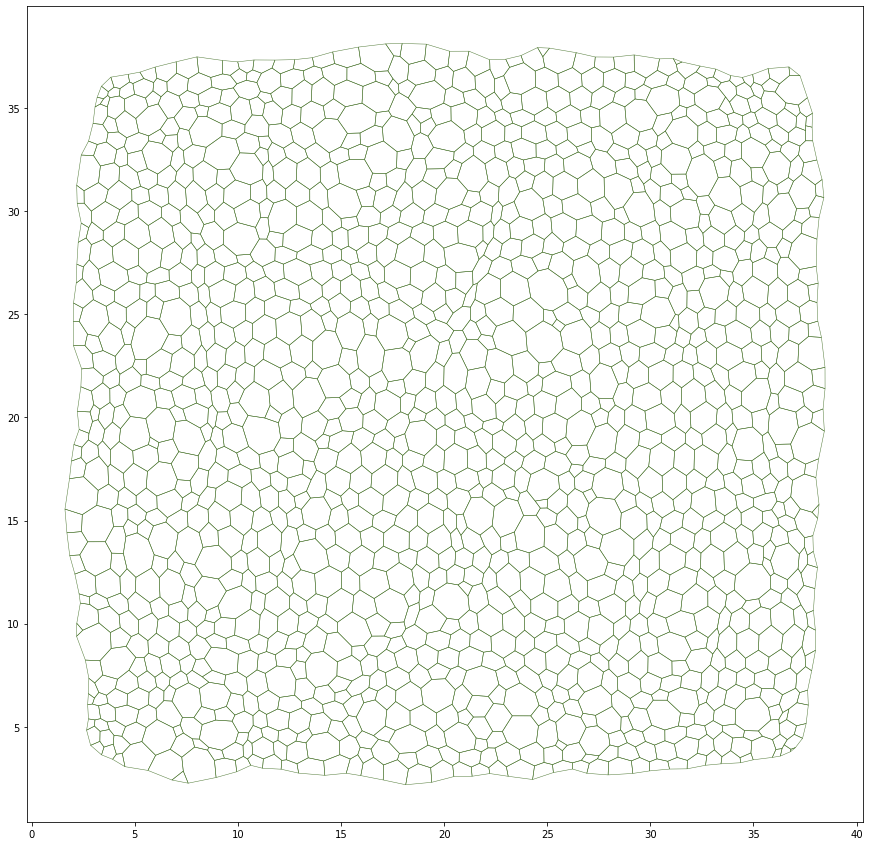

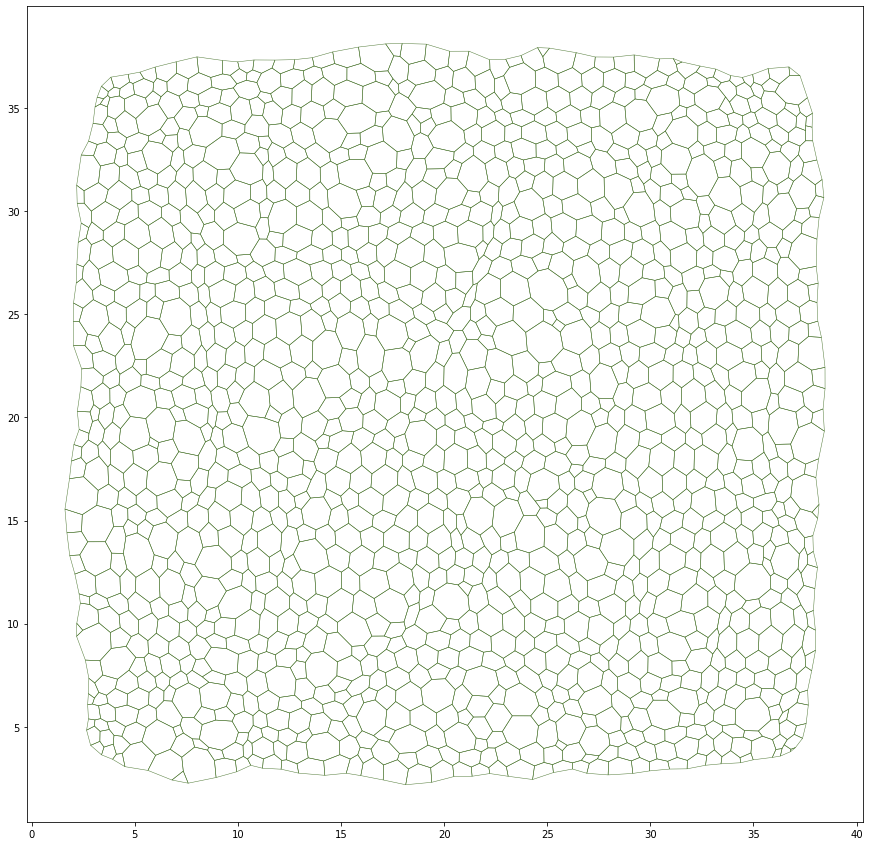

In [5]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show() 

In [6]:
cellmap_H.edge_df

trgt        nz    length  face  srce        dx        dy         sx  \
edge                                                                        
0       41  0.114786  0.480551   545    39 -0.241907  0.415223  27.398259   
1       39  0.353468  0.480551   583    41  0.241907 -0.415223  27.156352   
2       40  0.413549  0.492847   509    39 -0.377916 -0.316351  27.398259   
3       39  0.133663  0.492847   545    40  0.377916  0.316351  27.020343   
4       42  0.279746  0.622995   544    40 -0.299572  0.546241  27.020343   
...    ...       ...       ...   ...   ...       ...       ...        ...   
8114   507  0.175301  0.944807  1004  2366 -0.147100 -0.933285   2.401091   
8115  2754  0.161354  0.336984   134   158  0.307965 -0.136805  25.103865   
8116   158  0.235722  0.336984    96  2754 -0.307965  0.136805  25.411830   
8117  2755  0.334838  0.506807   950  1128 -0.410448  0.297298  22.329516   
8118  1128  0.240891  0.506807   987  2755  0.410448 -0.297298  21.919067   

             sy         tx  ...        uy        rx        ry  sub_area  \
edge                        ...                                           
0     16.136766  27.156352  ...  0.864057  0.324328 -0.082191  0.057393   
1     16.551989  27.398259  ... -0.864057 -0.729232 -0.209477  0.176734   
2     16.136766  27.020343  ... -0.641884 -0.281966  0.858256  0.206774   
3     15.820415  27.398259  ...  0.641884 -0.053588 -0.398542  0.066831   
4     15.820415  26.720770  ...  0.876798  0.535922 -0.043383  0.139873   
...         ...        ...  ...       ...       ...       ...       ...   
8114  29.425782   2.253992  ... -0.987806 -0.114006  0.468396  0.087650   
8115   5.355138  25.411830  ... -0.405969 -0.314351 -0.384295  0.080677   
8116   5.218333  25.103865  ...  0.405969  0.367212  0.602294  0.117861   
8117  27.581588  21.919067  ...  0.586609  0.551688  0.416186  0.167419   
8118  27.878885  22.329516  ... -0.586609 -0.459047 -0.254398  0.120445   

      is_active  length_elasticity  prefered_length       uz  \
edge                                                           
0             1         140.447294         0.081078  0.57735   
1             1         140.447294         0.081078  0.57735   
2             1         140.353470         0.056276  0.57735   
3             1         140.353470         0.056276  0.57735   
4             1         140.147334         0.051417  0.57735   
...         ...                ...              ...      ...   
8114          1         140.339238         0.093435  0.57735   
8115          1         140.262144         0.073363  0.57735   
8116          1         140.262144         0.073363  0.57735   
8117          1         140.143629         0.063370  0.57735   
8118          1         140.143629         0.063370  0.57735   

      length_elasticity_ECM  length_elasticity_FRC  
edge                                                
0                 40.045886             100.401408  
1                 40.045886             100.401408  
2                 40.099887             100.253583  
3                 40.099887             100.253583  
4                 40.007906             100.139427  
...                     ...                    ...  
8114              40.015718             100.323520  
8115              40.041300             100.220844  
8116              40.041300             100.220844  
8117              40.033782             100.109847  
8118              40.033782             100.109847  

[8119 rows x 24 columns]

trgt        nz    length  face  srce        dx        dy         sx  \
edge                                                                        
0       41  0.114786  0.480551   545    39 -0.241907  0.415223  27.398259   
1       39  0.353468  0.480551   583    41  0.241907 -0.415223  27.156352   
2       40  0.413549  0.492847   509    39 -0.377916 -0.316351  27.398259   
3       39  0.133663  0.492847   545    40  0.377916  0.316351  27.020343   
4       42  0.279746  0.622995   544    40 -0.299572  0.546241  27.020343   
...    ...       ...       ...   ...   ...       ...       ...        ...   
8114   507  0.175301  0.944807  1004  2366 -0.147100 -0.933285   2.401091   
8115  2754  0.161354  0.336984   134   158  0.307965 -0.136805  25.103865   
8116   158  0.235722  0.336984    96  2754 -0.307965  0.136805  25.411830   
8117  2755  0.334838  0.506807   950  1128 -0.410448  0.297298  22.329516   
8118  1128  0.240891  0.506807   987  2755  0.410448 -0.297298  21.919067   

             sy         tx  ...        uy        rx        ry  sub_area  \
edge                        ...                                           
0     16.136766  27.156352  ...  0.864057  0.324328 -0.082191  0.057393   
1     16.551989  27.398259  ... -0.864057 -0.729232 -0.209477  0.176734   
2     16.136766  27.020343  ... -0.641884 -0.281966  0.858256  0.206774   
3     15.820415  27.398259  ...  0.641884 -0.053588 -0.398542  0.066831   
4     15.820415  26.720770  ...  0.876798  0.535922 -0.043383  0.139873   
...         ...        ...  ...       ...       ...       ...       ...   
8114  29.425782   2.253992  ... -0.987806 -0.114006  0.468396  0.087650   
8115   5.355138  25.411830  ... -0.405969 -0.314351 -0.384295  0.080677   
8116   5.218333  25.103865  ...  0.405969  0.367212  0.602294  0.117861   
8117  27.581588  21.919067  ...  0.586609  0.551688  0.416186  0.167419   
8118  27.878885  22.329516  ... -0.586609 -0.459047 -0.254398  0.120445   

      is_active  length_elasticity  prefered_length       uz  \
edge                                                           
0             1         140.447294         0.081078  0.57735   
1             1         140.447294         0.081078  0.57735   
2             1         140.353470         0.056276  0.57735   
3             1         140.353470         0.056276  0.57735   
4             1         140.147334         0.051417  0.57735   
...         ...                ...              ...      ...   
8114          1         140.339238         0.093435  0.57735   
8115          1         140.262144         0.073363  0.57735   
8116          1         140.262144         0.073363  0.57735   
8117          1         140.143629         0.063370  0.57735   
8118          1         140.143629         0.063370  0.57735   

      length_elasticity_ECM  length_elasticity_FRC  
edge                                                
0                 40.045886             100.401408  
1                 40.045886             100.401408  
2                 40.099887             100.253583  
3                 40.099887             100.253583  
4                 40.007906             100.139427  
...                     ...                    ...  
8114              40.015718             100.323520  
8115              40.041300             100.220844  
8116              40.041300             100.220844  
8117              40.033782             100.109847  
8118              40.033782             100.109847  

[8119 rows x 24 columns]

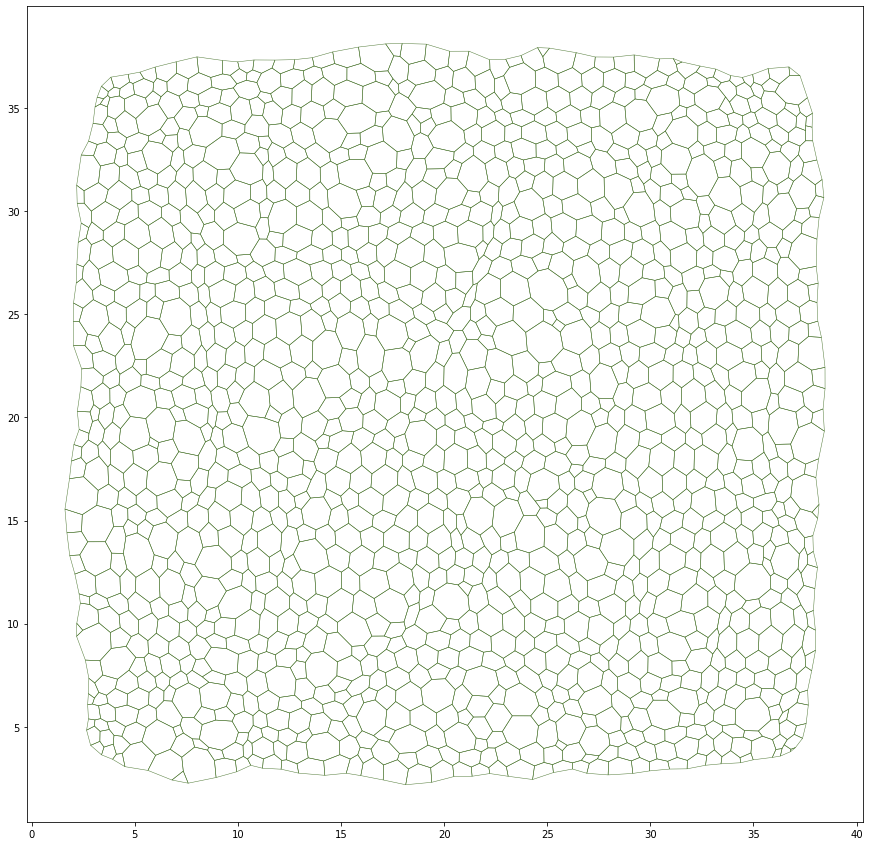

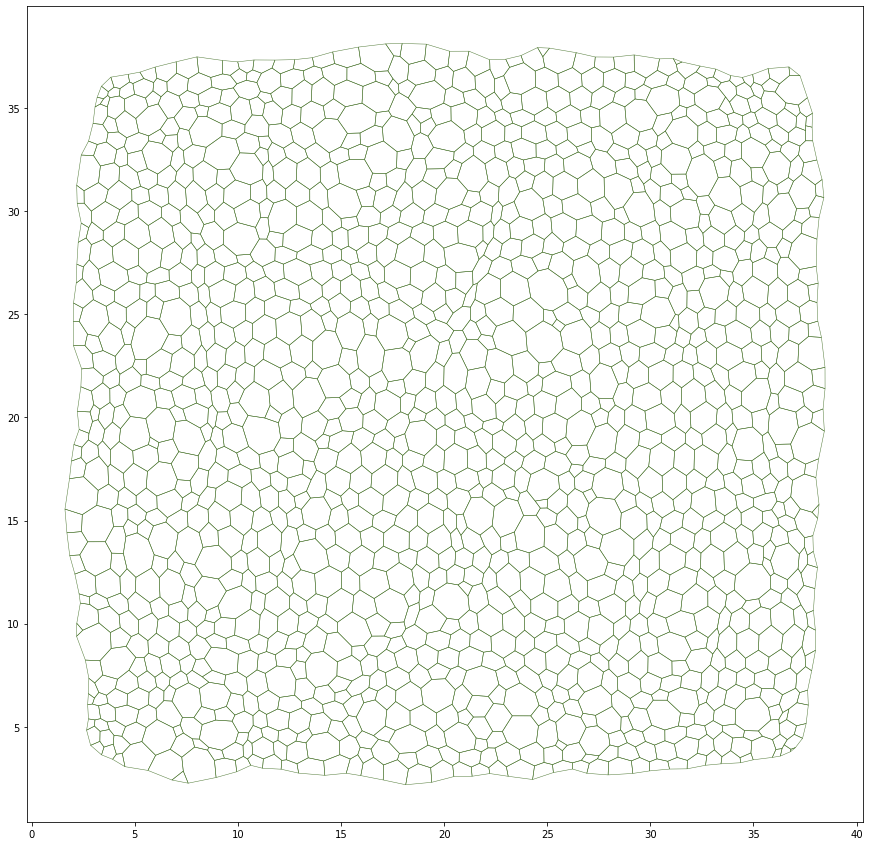

In [7]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))

In [31]:
cellmap_H.edge_df['length_elasticity_ECM']

edge
0       2.502868
1       2.502868
2       2.506243
3       2.506243
4       2.500494
          ...   
8114    2.500982
8115    2.502581
8116    2.502581
8117    2.502111
8118    2.502111
Name: length_elasticity_ECM, Length: 8119, dtype: float64

edge
0       2.502868
1       2.502868
2       2.506243
3       2.506243
4       2.500494
          ...   
8114    2.500982
8115    2.502581
8116    2.502581
8117    2.502111
8118    2.502111
Name: length_elasticity_ECM, Length: 8119, dtype: float64

In [25]:
cellmap_H.edge_df['length_elasticity_ECM'] = cellmap_H.edge_df['length_elasticity_ECM']/2

In [26]:
cellmap_H.edge_df

trgt        nz    length  face  srce        dx        dy         sx  \
edge                                                                        
0       41  0.138219  0.584694   545    39 -0.239638  0.533329  27.455044   
1       39  0.390153  0.584694   583    41  0.239638 -0.533329  27.215405   
2       40  0.361124  0.424750   509    39 -0.375648 -0.198245  27.455044   
3       39  0.117017  0.424750   545    40  0.375648  0.198245  27.079396   
4       42  0.268465  0.522535   544    40 -0.299572  0.428135  27.079396   
...    ...       ...       ...   ...   ...       ...       ...        ...   
8114   507  0.149014  0.945519  1004  2366 -0.160430 -0.931810   2.708035   
8115  2754  0.199868  0.455826   134   158  0.426721 -0.160269  25.044162   
8116   158  0.330229  0.455826    96  2754 -0.426721  0.160269  25.470883   
8117  2755  0.314253  0.505087   950  1128 -0.408322  0.297298  22.268337   
8118  1128  0.240022  0.505087   987  2755  0.408322 -0.297298  21.860014   

             sy         tx  ...        uy        rx        ry  sub_area  \
edge                        ...                                           
0     16.194343  27.215405  ...  0.912152  0.322627 -0.141244  0.069109   
1     16.727673  27.455044  ... -0.912152 -0.684879 -0.103853  0.195077   
2     16.194343  27.079396  ... -0.466733 -0.246890  0.831042  0.180562   
3     15.996098  27.455044  ...  0.466733 -0.053021 -0.339488  0.058508   
4     15.996098  26.779823  ...  0.819342  0.557795  0.098987  0.134232   
...         ...        ...  ...       ...       ...       ...       ...   
8114  29.130693   2.547605  ... -0.985500 -0.074319  0.497184  0.074507   
8115   5.886264  25.470883  ... -0.351602 -0.372587 -0.328444  0.099934   
8116   5.725994  25.044162  ...  0.351602  0.418611  0.616652  0.165114   
8117  27.405255  21.860014  ...  0.588607  0.553622  0.366531  0.157127   
8118  27.702552  22.268337  ... -0.588607 -0.458092 -0.254290  0.120011   

      is_active  length_elasticity  prefered_length       uz  \
edge                                                           
0             1         140.447294         0.081078  0.57735   
1             1         140.447294         0.081078  0.57735   
2             1         140.353470         0.056276  0.57735   
3             1         140.353470         0.056276  0.57735   
4             1         140.147334         0.051417  0.57735   
...         ...                ...              ...      ...   
8114          1         140.339238         0.093435  0.57735   
8115          1         140.262144         0.073363  0.57735   
8116          1         140.262144         0.073363  0.57735   
8117          1         140.143629         0.063370  0.57735   
8118          1         140.143629         0.063370  0.57735   

      length_elasticity_ECM  length_elasticity_FRC  
edge                                                
0                  2.502868             100.401408  
1                  2.502868             100.401408  
2                  2.506243             100.253583  
3                  2.506243             100.253583  
4                  2.500494             100.139427  
...                     ...                    ...  
8114               2.500982             100.323520  
8115               2.502581             100.220844  
8116               2.502581             100.220844  
8117               2.502111             100.109847  
8118               2.502111             100.109847  

[8119 rows x 24 columns]

trgt        nz    length  face  srce        dx        dy         sx  \
edge                                                                        
0       41  0.138219  0.584694   545    39 -0.239638  0.533329  27.455044   
1       39  0.390153  0.584694   583    41  0.239638 -0.533329  27.215405   
2       40  0.361124  0.424750   509    39 -0.375648 -0.198245  27.455044   
3       39  0.117017  0.424750   545    40  0.375648  0.198245  27.079396   
4       42  0.268465  0.522535   544    40 -0.299572  0.428135  27.079396   
...    ...       ...       ...   ...   ...       ...       ...        ...   
8114   507  0.149014  0.945519  1004  2366 -0.160430 -0.931810   2.708035   
8115  2754  0.199868  0.455826   134   158  0.426721 -0.160269  25.044162   
8116   158  0.330229  0.455826    96  2754 -0.426721  0.160269  25.470883   
8117  2755  0.314253  0.505087   950  1128 -0.408322  0.297298  22.268337   
8118  1128  0.240022  0.505087   987  2755  0.408322 -0.297298  21.860014   

             sy         tx  ...        uy        rx        ry  sub_area  \
edge                        ...                                           
0     16.194343  27.215405  ...  0.912152  0.322627 -0.141244  0.069109   
1     16.727673  27.455044  ... -0.912152 -0.684879 -0.103853  0.195077   
2     16.194343  27.079396  ... -0.466733 -0.246890  0.831042  0.180562   
3     15.996098  27.455044  ...  0.466733 -0.053021 -0.339488  0.058508   
4     15.996098  26.779823  ...  0.819342  0.557795  0.098987  0.134232   
...         ...        ...  ...       ...       ...       ...       ...   
8114  29.130693   2.547605  ... -0.985500 -0.074319  0.497184  0.074507   
8115   5.886264  25.470883  ... -0.351602 -0.372587 -0.328444  0.099934   
8116   5.725994  25.044162  ...  0.351602  0.418611  0.616652  0.165114   
8117  27.405255  21.860014  ...  0.588607  0.553622  0.366531  0.157127   
8118  27.702552  22.268337  ... -0.588607 -0.458092 -0.254290  0.120011   

      is_active  length_elasticity  prefered_length       uz  \
edge                                                           
0             1         140.447294         0.081078  0.57735   
1             1         140.447294         0.081078  0.57735   
2             1         140.353470         0.056276  0.57735   
3             1         140.353470         0.056276  0.57735   
4             1         140.147334         0.051417  0.57735   
...         ...                ...              ...      ...   
8114          1         140.339238         0.093435  0.57735   
8115          1         140.262144         0.073363  0.57735   
8116          1         140.262144         0.073363  0.57735   
8117          1         140.143629         0.063370  0.57735   
8118          1         140.143629         0.063370  0.57735   

      length_elasticity_ECM  length_elasticity_FRC  
edge                                                
0                  2.502868             100.401408  
1                  2.502868             100.401408  
2                  2.506243             100.253583  
3                  2.506243             100.253583  
4                  2.500494             100.139427  
...                     ...                    ...  
8114               2.500982             100.323520  
8115               2.502581             100.220844  
8116               2.502581             100.220844  
8117               2.502111             100.109847  
8118               2.502111             100.109847  

[8119 rows x 24 columns]

In [27]:
energyContributions_model.compute_energy(cellmap_H)
vertexModel.solveEuler(cellmap_H, geom, energyContributions_model, endTime = 100)

 tyssue.geometry.planar_geometry.PlanarGeometry,
 tyssue.dynamics.factory.model_factory.<locals>.NewModel,

 tyssue.geometry.planar_geometry.PlanarGeometry,
 tyssue.dynamics.factory.model_factory.<locals>.NewModel,

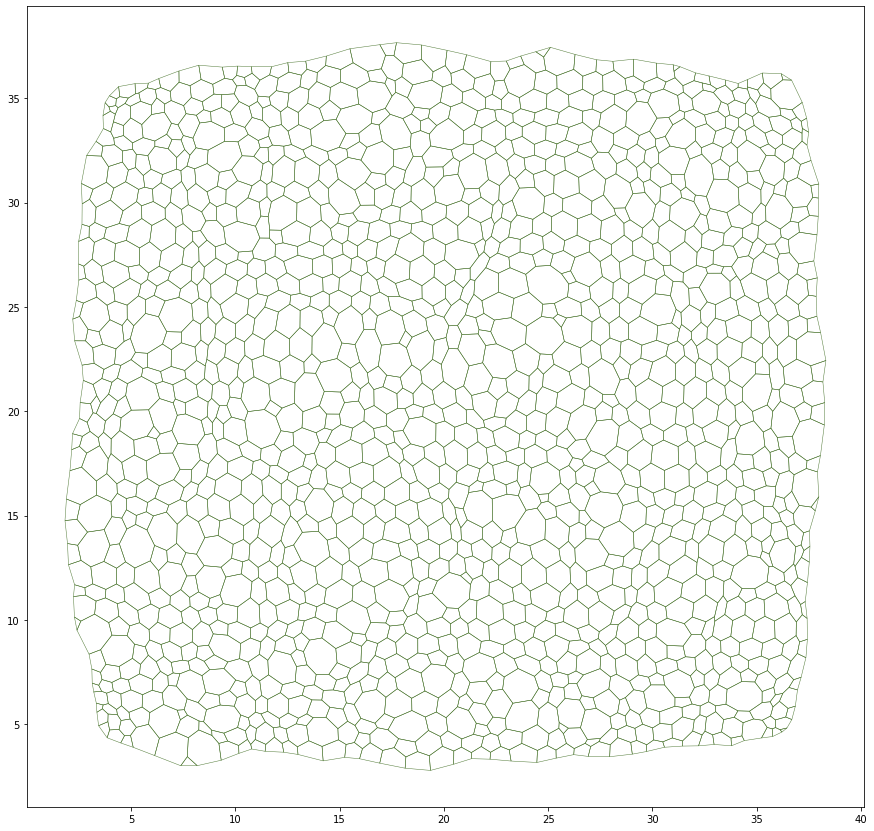

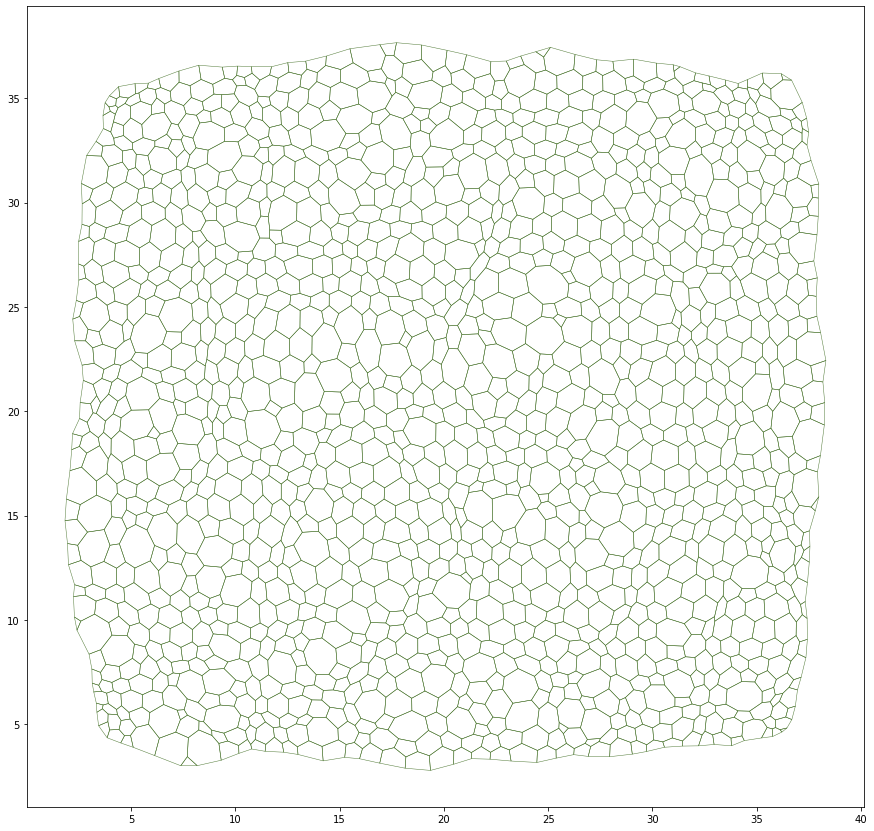

In [28]:
fig, ax = sheet_view(cellmap_H)
fig.set_size_inches((15, 15))
plt.show() 

In [29]:
from matplotlib import cm
from matplotlib.cm import ScalarMappable

def heatmap_of_edges(cellmap, parameter):

    ## condition should be in the form: cellmap.edge_df["parameter"]

    specs = {
        'face': {
            'visible': False,
        },
        'edge': {
            'visible': True,
            'color': parameter,
            'colormap': 'RdPu',
            'width': 2,
        },
        'vert': {
            'visible': False,
        }
    }

    fig, ax = sheet_view(cellmap, **specs)

    norm = plt.Normalize(vmin=parameter.min(), vmax=parameter.max())
    sm = ScalarMappable(cmap=cm.RdPu, norm=norm)
    sm.set_array([])  # You can set an empty array or a list of values here

    #Add a colorbar using the ScalarMappable
    cbar = plt.colorbar(sm, ax=ax)
    fig.set_size_inches(20,20)

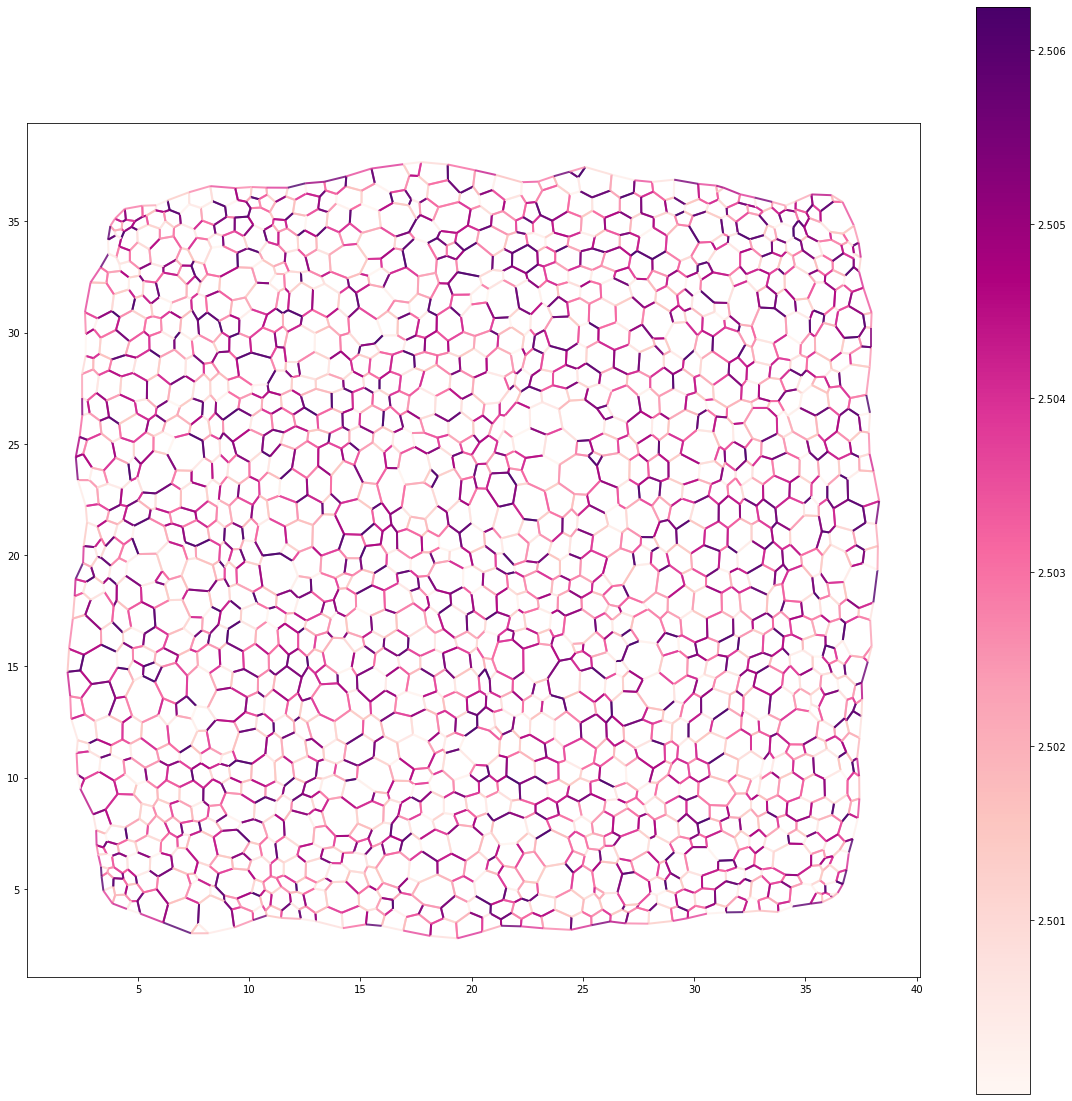

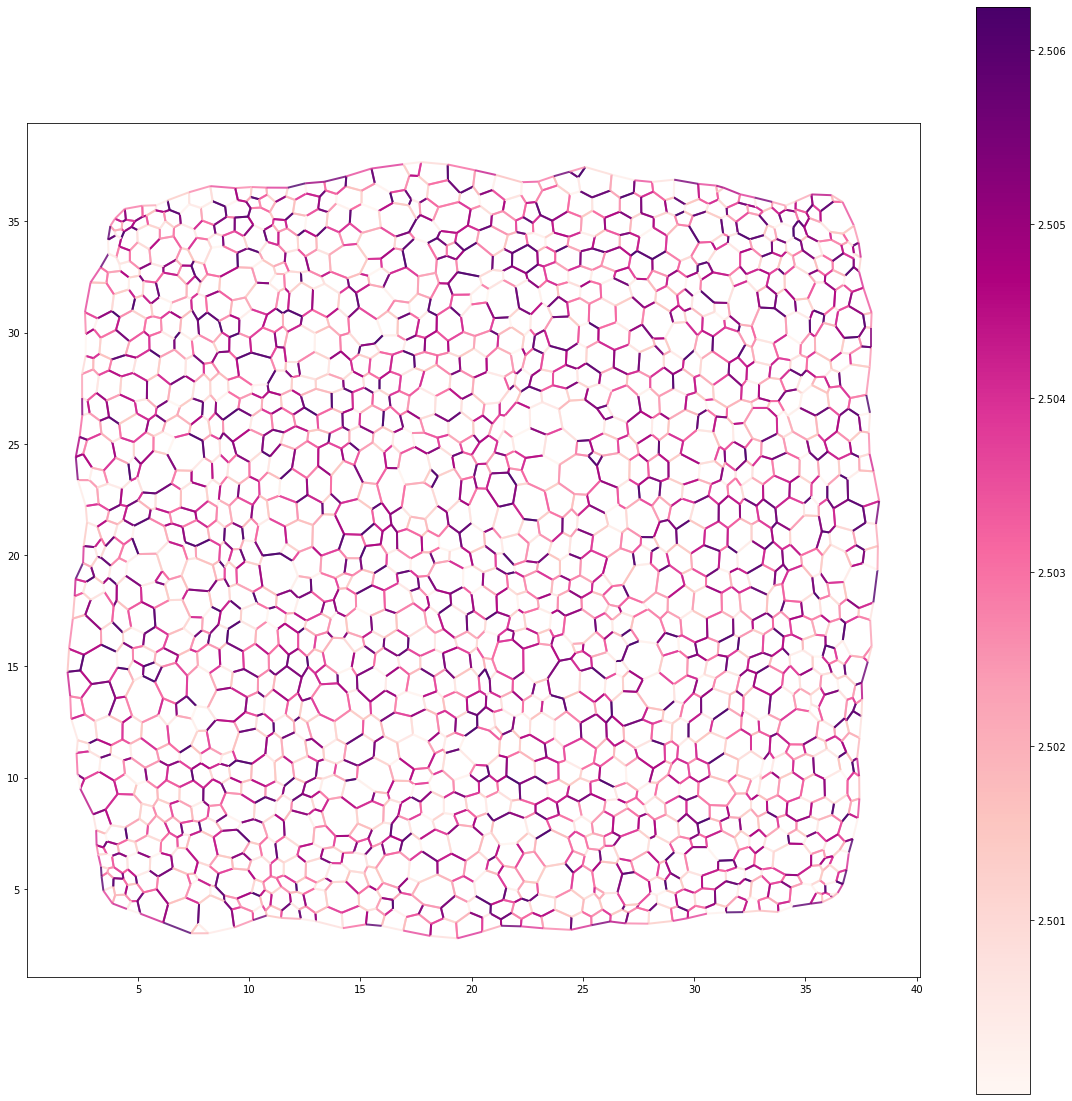

In [30]:
heatmap_of_edges(cellmap_H, cellmap_H.edge_df["length_elasticity_ECM"])